# Imports

In [1]:
import sys
sys.path.insert(0, '/Users/hinzlehome/codeup-data-science/time-series-exercises/')
from utils.imports import *
from utils.acquire import *
from utils.prepare import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)

# plt.style.available
# ^^^ show available seaborn styles

In [3]:
store=merge_on_sales()
store = prep_store_data(store)

cached csv
cached csv
cached csv


In [4]:
store.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   quantity       913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  dow            913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 118.4+ MB

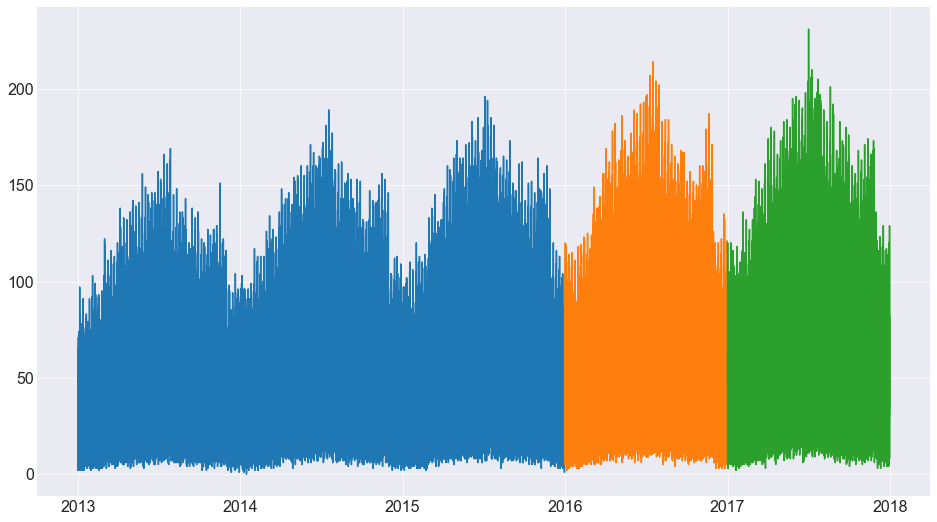

In [5]:
train = store.loc[:'2015'] # includes 2016
validate =store.loc['2016'] 
test = store.loc['2017']

plt.plot(train.index, train.quantity)
plt.plot(validate.index, validate.quantity)
plt.plot(test.index, test.quantity)


Column: item_id


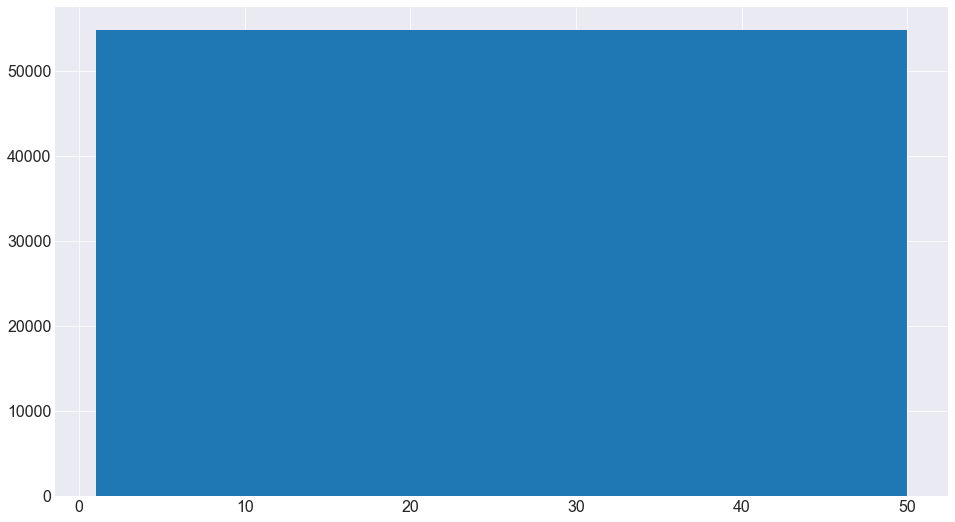

Column: quantity


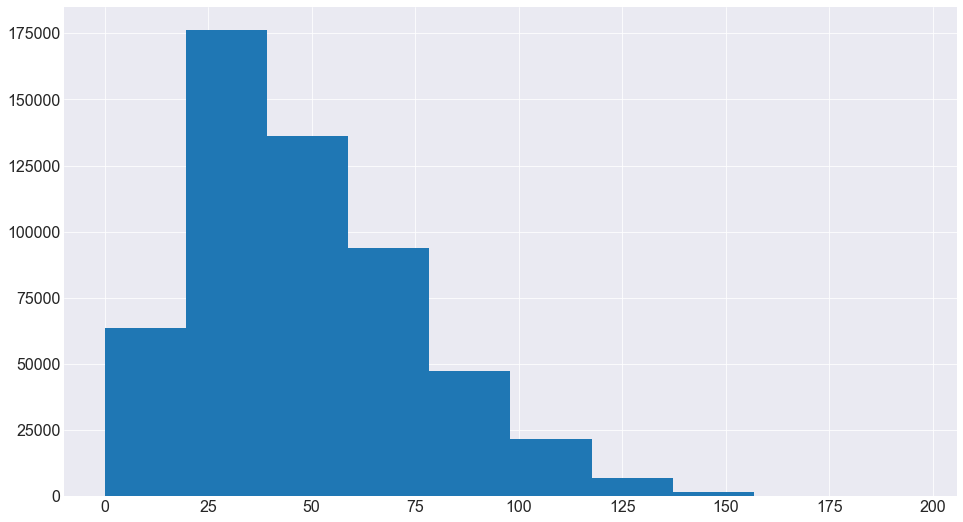

Column: sale_id


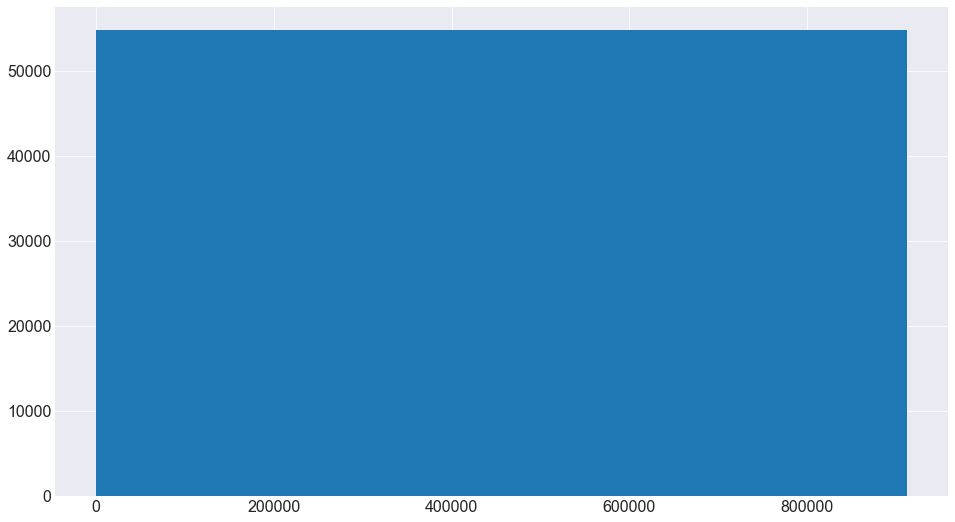

Column: store_id


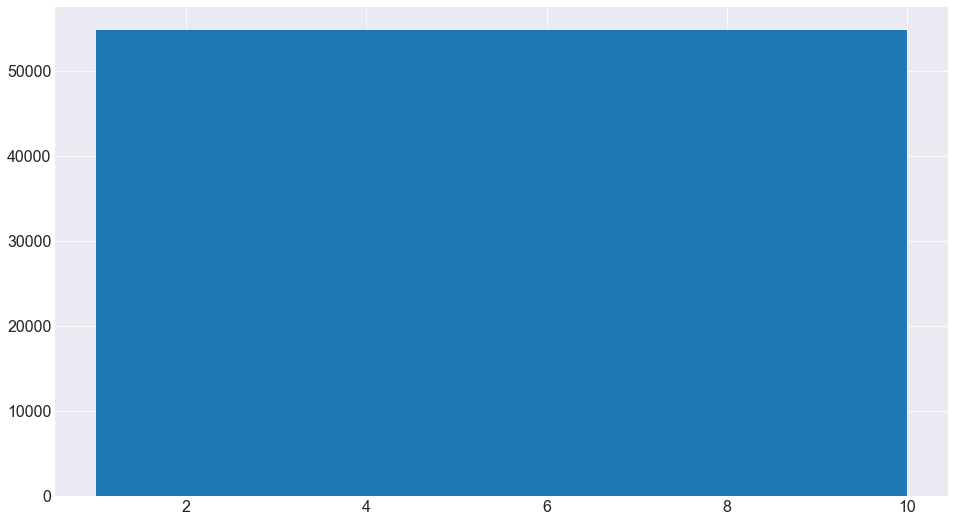

Column: item_brand


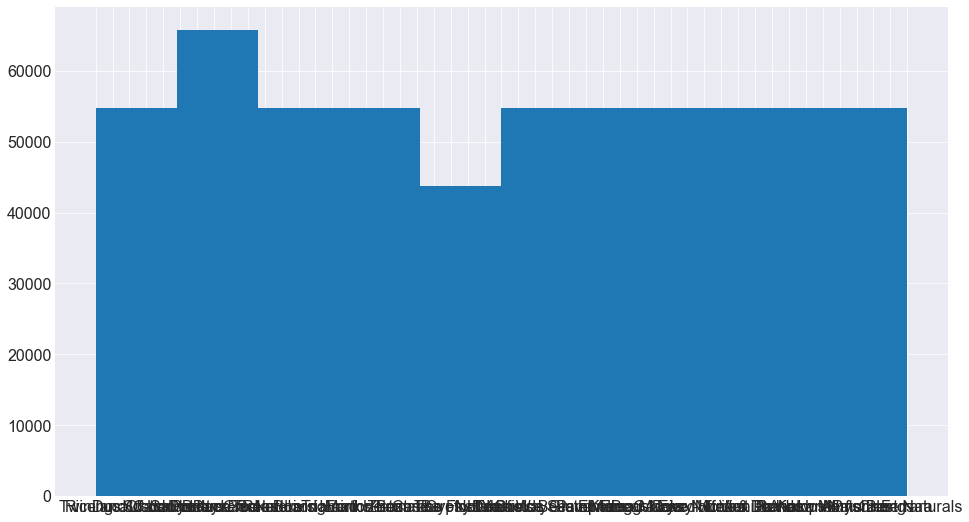

Column: item_name


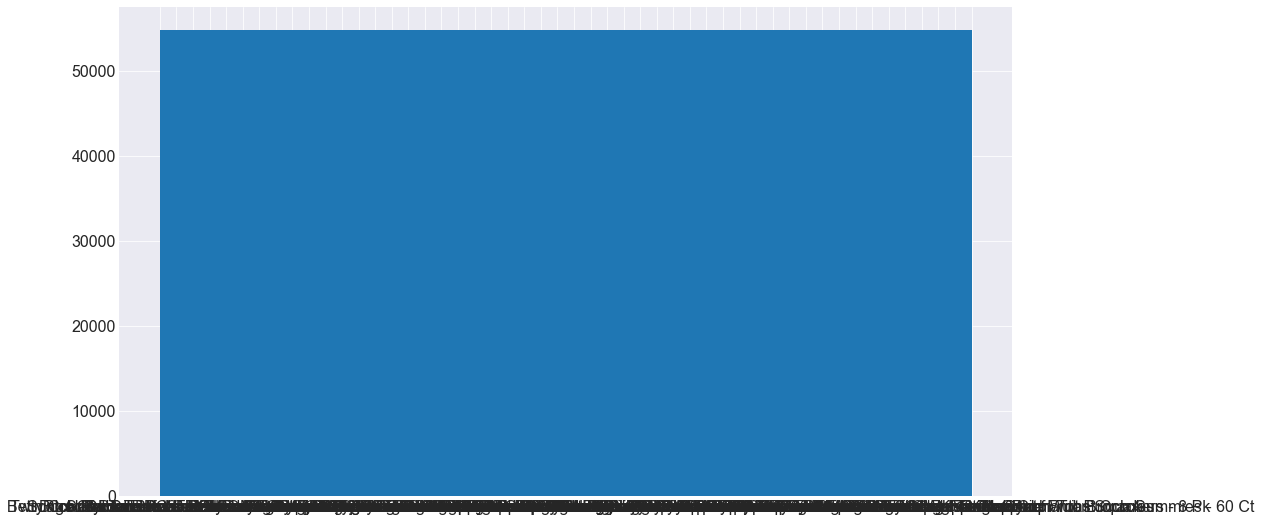

Column: item_price


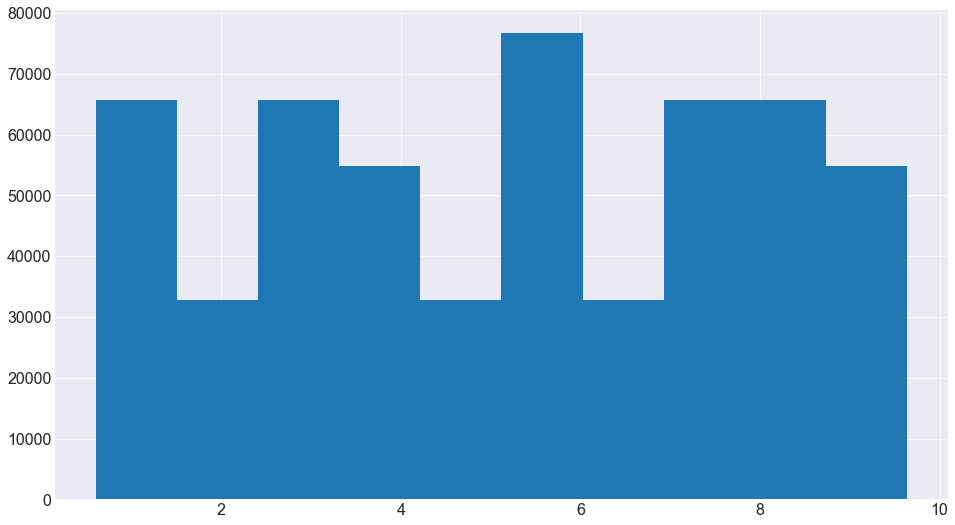

Column: item_upc12


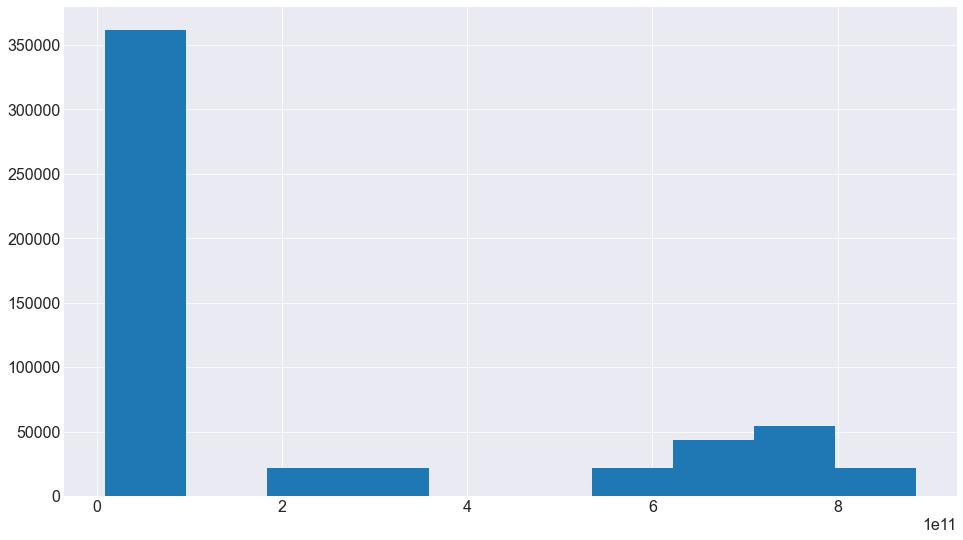

Column: item_upc14


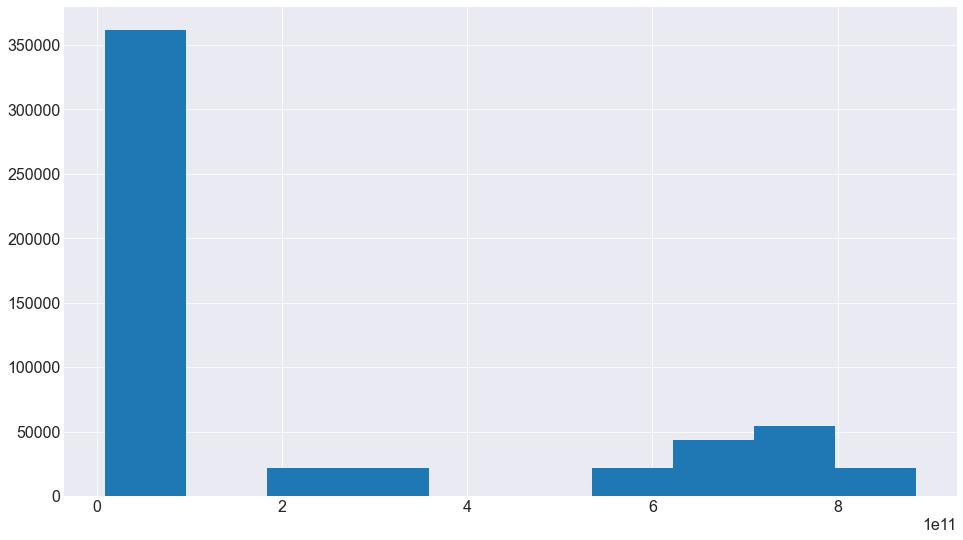

Column: store_address


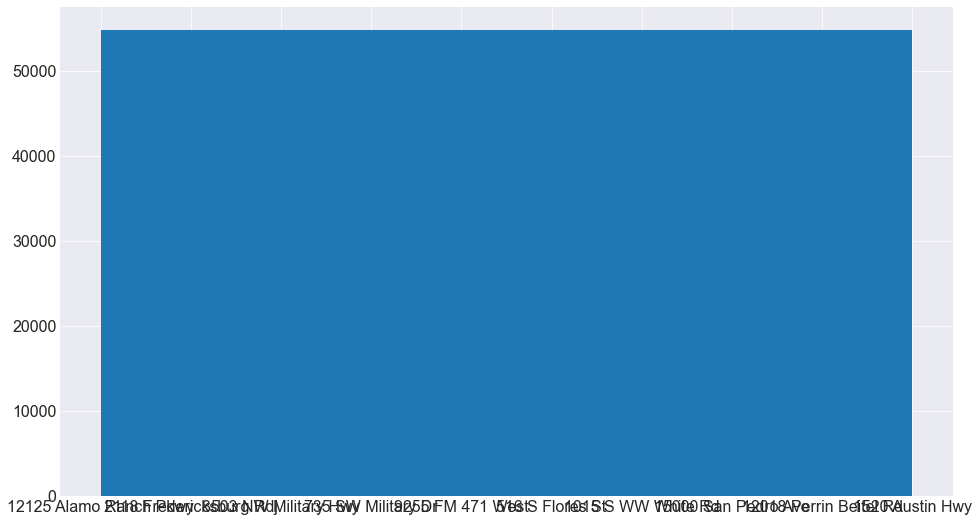

Column: store_city


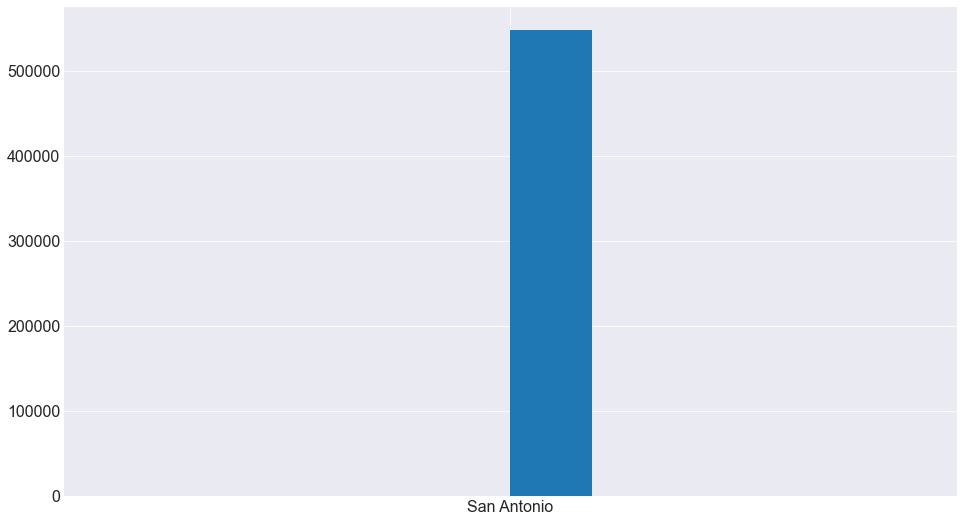

Column: store_state


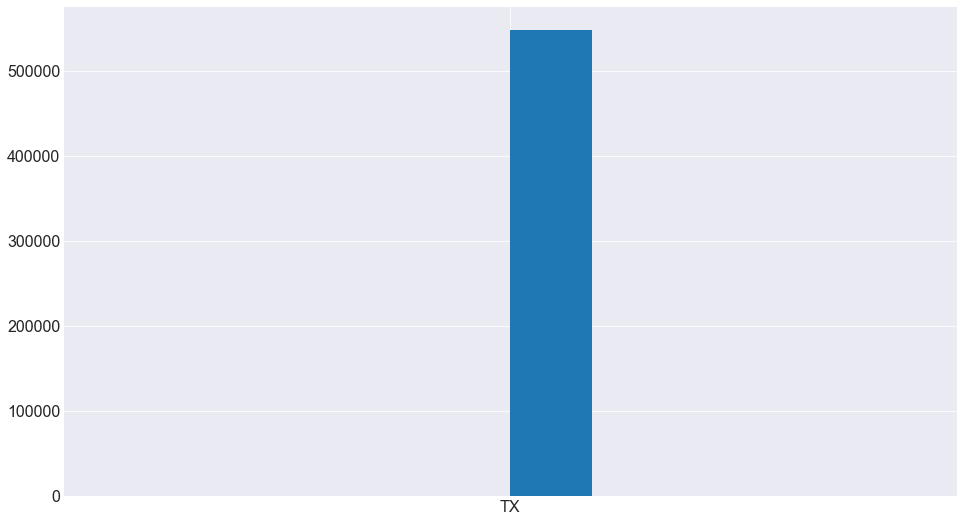

Column: store_zipcode


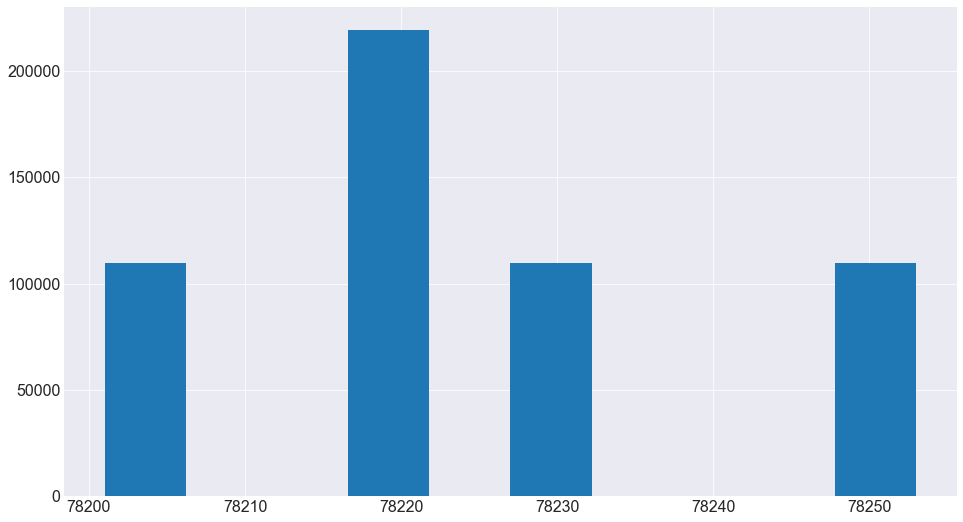

Column: month


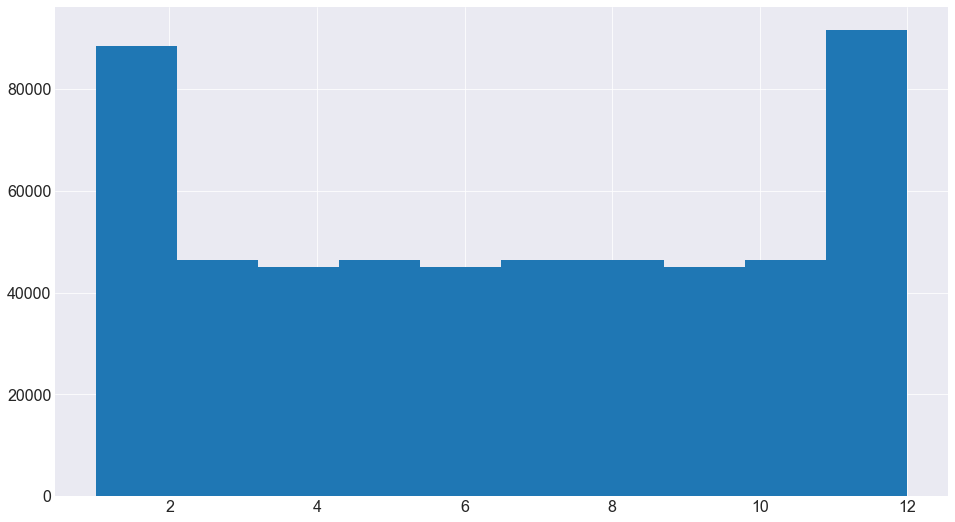

Column: dow


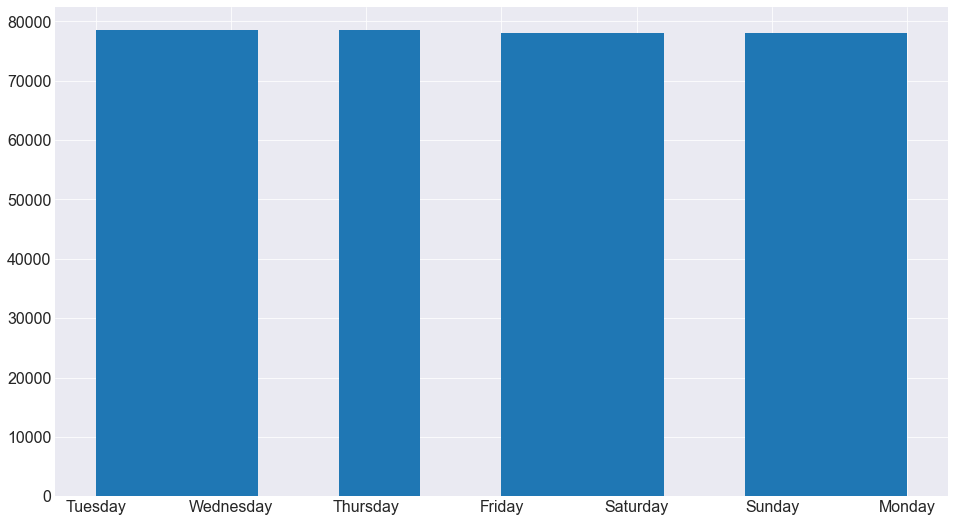

Column: sales_total


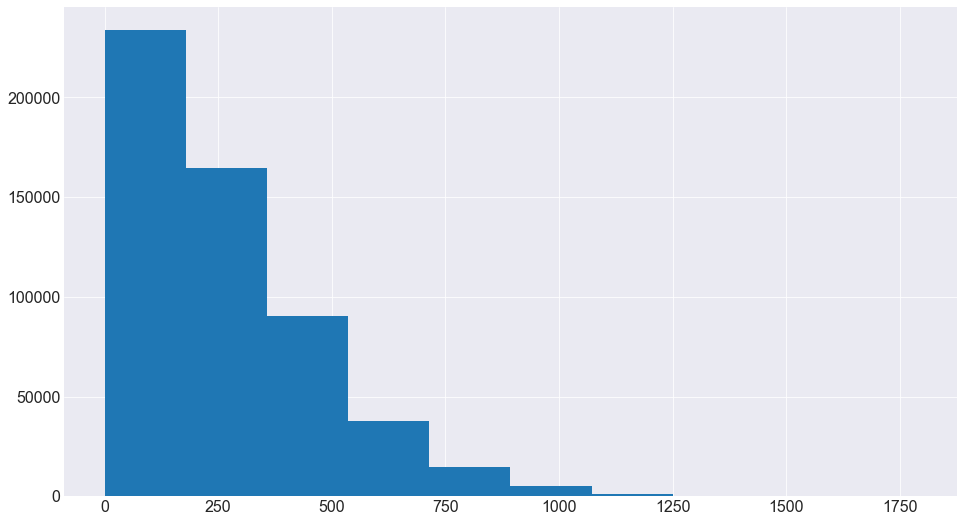

In [6]:
# univariate analysis of columns:
for col in train.columns:
    print('Column: ' + col)
    plt.hist(train[col])
    plt.show()

In [ ]:
# [sns.displot(store[col] ,kde = True, rug = True) for col in store.columns.to_list()]

In [ ]:
# [sns.relplot(x=store.index,y=col,data=store) for col in store.columns.to_list()]

In [ ]:
# sns.relplot(x=train.index, y='sales_total',data=train,aspect=1.5)

# The drones you're looking for...


Thanks Zach:

Python``` train.select_dtypes('number')```

Extra thanks on this one:  

`jupyter nbconvert --clear-output explore.ipynb`

Thanks Ben:

`l=zip([1,2,3],['a','b','c'])`  
`for x,y in zip(df.x, df.y):`  
`print(x,y)`  
`df=pd.DataFrame(data=(zip([1,2,3],['a','b','c'])))`  
`df.columns=['x','y']`  

D Daily
W Weekly
M Monthly
Q Quarterly
Y Yearly


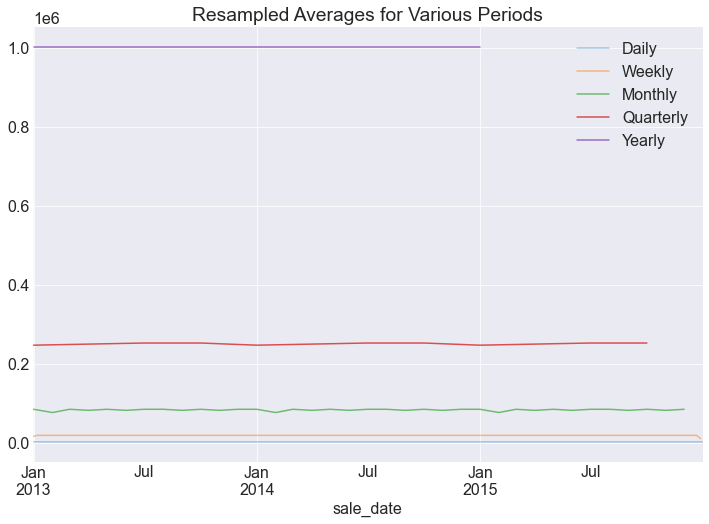

In [8]:
# for col in train.columns.to_list():
#     if train[col].dtype

target='store_id'
periods = ['D', 'W', 'M','Q', 'Y']
period_labels = ['Daily', 'Weekly', 
                 'Monthly', 'Quarterly', 'Yearly']
                 
alpha = .2
for per, per_label in zip(periods, period_labels):
    print(per,per_label)
    alpha += .15
    train[target].resample(per).sum().plot(alpha=alpha, 
                                            figsize=(12,8), 
                                            label=per_label)
plt.title('Resampled Averages for Various Periods')
plt.legend()
plt.show()